# CSCI 39543 Project: Reviews Sentiment Analysis


## 1. Collecting Data

### 1.1 Dataset Title: 

    amazon_reviews Data_Set
    
### 1.2 Dataset Source: 
    Amazon AWS 
    https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt
    
### 1.3 Dataset Description:
    
    This dataset contains more than 6M consumer reviews on different products. This data can be used to improve customer experience, optimize product offerings, and identify areas of improvement. The data includes customer reviews, ratings, and other related information. It can also include customer demographics, purchase history, and other related data.

### 1.4 Project Objective:
    The objective of this project is to find various trends and patterns and create useful insights for the best quality product. We must determine whether the review is favorable or unfavorable. A grade of four or five might be seen as a positive review, one or two as a negative review, and three as neutral. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.

## 2. Exploratory Data Analysis (EDA):

### 2.1 Data:

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
import re, string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [3]:
df = pd.read_csv('Reviews.csv')  

In [4]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [5]:
# Identify duplicate rows
duplicate_rows = df.duplicated()

# Count the duplicates
num_duplicates = duplicate_rows.sum()

# Report the result
print(f"The dataset contains {num_duplicates} duplicate rows.")

The dataset contains 0 duplicate rows.


In [6]:
df.shape

(568454, 10)

In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
df.rename(columns={'Summary': 'review_headline', 'Text': 'review_text', 'Score': 'review_score', 'Time' : 'review_time'}, inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   review_score            568454 non-null  int64 
 7   review_time             568454 non-null  int64 
 8   review_headline         568427 non-null  object
 9   review_text             568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


### 2.2 Preprocessing the Data
    Dropping unwanted features, duplicated values, and removing null values,. In addition to converting the 
    review_date type from object to datetime

In [10]:
# droping unwanted features 
df = df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator' ], axis=1)

In [11]:
df

,review_score,review_time,review_headline,review_text
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...
568449,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [12]:
df.shape

(568454, 4)

In [13]:
# converting review_date type from object to date_time
df['review_time'] = pd.to_datetime(df['review_time'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   review_score     568454 non-null  int64         
 1   review_time      568454 non-null  datetime64[ns]
 2   review_headline  568427 non-null  object        
 3   review_text      568454 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 17.3+ MB


In [15]:
df.isnull().sum()

review_score        0
review_time         0
review_headline    27
review_text         0
dtype: int64

In [16]:
# Removing null values
df = df.dropna()

In [17]:
df.isnull().sum()

review_score       0
review_time        0
review_headline    0
review_text        0
dtype: int64

In [19]:
df.shape

(568427, 4)

### Cleaning the text: 

In [15]:
def clean_text(text):
    # Converting to lowercase
    text = text.lower()
    
    # Removing URLs
    text = re.sub(r'https?://\S+', '', text)
    
    # Removing punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if not token in stop_words]
    
    # Joining the tokens to form the cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [ ]:
df['review_text'] = df['review_text'].apply(clean_text)
df['review_text'].head()

In [46]:
df['review_headline'] = df['review_headline'].apply(clean_text)
df['review_headline'].head()

/var/folders/x8/pfwdb4lj7tvd04gyn_xrpxsm0000gn/T/ipykernel_13512/1920234804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_headline'] = df['review_headline'].apply(clean_text)


0    good quality dog food
1               advertised
2             delight says
3           cough medicine
4              great taffy
Name: review_headline, dtype: object

In [13]:
def handle_negations(text):
    negation_terms = ["no", "not", "never"]  # Add more negation terms if needed
    words = re.findall(r'\w+', text)
    handled_words = []
    is_negation = False

    for word in words:
        if is_negation:
            word = "not_" + word
        handled_words.append(word)

        if word in negation_terms:
            is_negation = True
        else:
            is_negation = False

    handled_text = ' '.join(handled_words)
    return handled_text

In [14]:
df['review_text'] = df['review_text'].apply(handle_negations)
df['review_text'].head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price There was a wide ...
Name: review_text, dtype: object

In [49]:
df['review_headline'] = df['review_headline'].apply(handle_negations)
df['review_headline'].head()

/var/folders/x8/pfwdb4lj7tvd04gyn_xrpxsm0000gn/T/ipykernel_13512/1186026392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_headline'] = df['review_headline'].apply(handle_negations)


0    good quality dog food
1               advertised
2             delight says
3           cough medicine
4              great taffy
Name: review_headline, dtype: object

### 2.3 Data Visualization: 

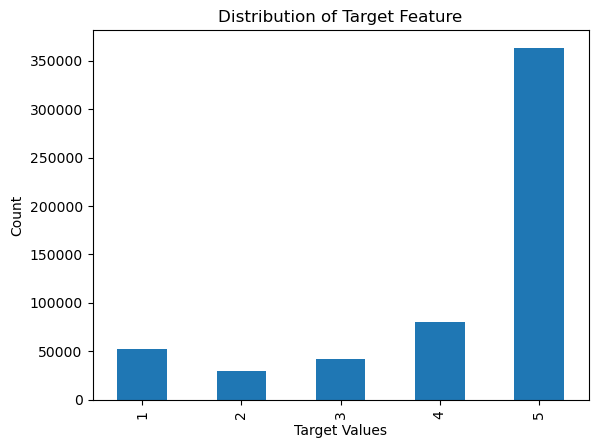

In [50]:
distribution = df['review_score'].value_counts().sort_index()
distribution.plot(kind='bar')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.title('Distribution of Target Feature')
plt.show()

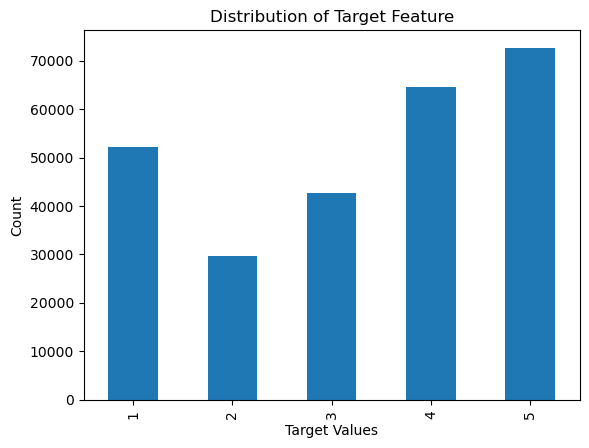

In [15]:
mask_5 = df['review_score'] == 5
mask_4 = df['review_score'] == 4
# Select 80% of the 5-star reviews to drop randomly
drop_indices_5 = df[mask_5].sample(frac=0.8, random_state=42).index

# Select 50% of the 4-star reviews to drop randomly
drop_indices_4 = df[mask_4].sample(frac=0.2, random_state=42).index

# Drop the selected rows
df = df.drop(drop_indices_5)

# Drop the selected rows
df = df.drop(drop_indices_4)

distribution = df['review_score'].value_counts().sort_index()
distribution.plot(kind='bar')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.title('Distribution of Target Feature')
plt.show()


In [16]:
date_counts = df['review_score'].value_counts()
date_counts

5    72624
4    64524
1    52268
3    42640
2    29769
Name: review_score, dtype: int64

In [75]:
df.shape

(261825, 4)

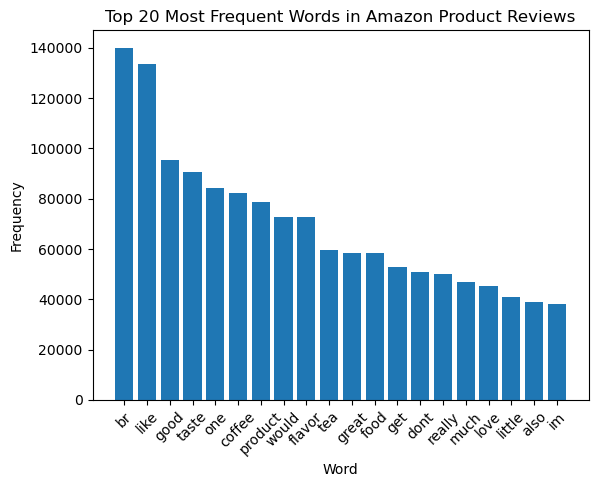

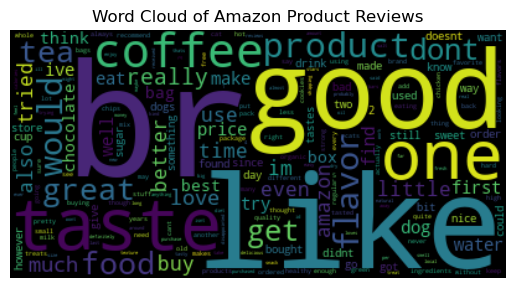

In [53]:
# Concatenate all review texts into one long string
df['review_text'] = df['review_text'].astype(str)

# Concatenate all review texts into one long string
all_text = ' '.join(df['review_text'].tolist())

# Split the text into individual words, remove stop words, and convert to lowercase
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in all_text.split() if word.lower() not in stop_words]

# Split the text into individual words, remove stop words, and convert to lowercase
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in all_text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 20 most frequent words
top_words = word_counts.most_common(20)

# Visualize the top 20 most frequent words in a bar chart
plt.bar(range(len(top_words)), [count for word, count in top_words])
plt.xticks(range(len(top_words)), [word for word, count in top_words], rotation=45)
plt.title('Top 20 Most Frequent Words in Amazon Product Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# Create a word cloud of the most frequent words
wordcloud = WordCloud().generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Amazon Product Reviews')
plt.show()



/var/folders/x8/pfwdb4lj7tvd04gyn_xrpxsm0000gn/T/ipykernel_13512/1554135886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['review_text'] = filtered_df['review_text'].astype(str)


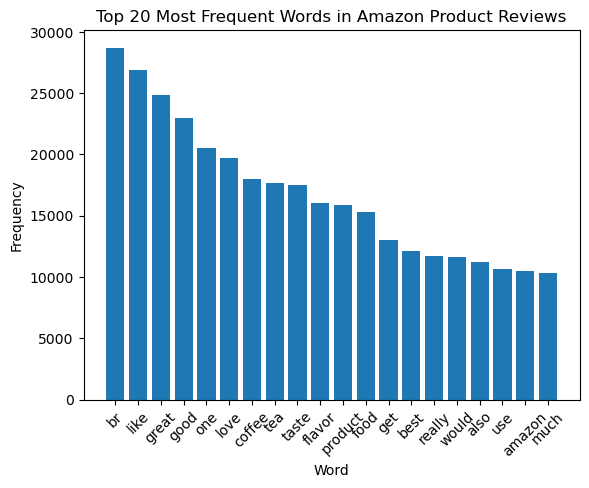

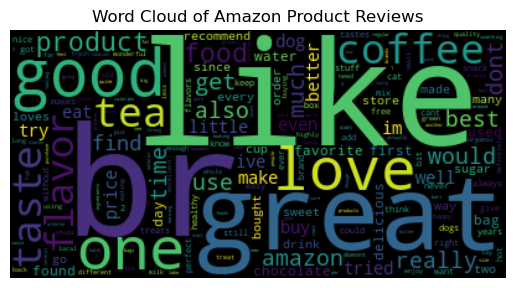

In [56]:
filtered_df = df[df['review_score'] == 5]

# Concatenate all review texts into one long string
filtered_df['review_text'] = filtered_df['review_text'].astype(str)

# Concatenate all review texts into one long string
all_text = ' '.join(filtered_df['review_text'].tolist())

# Split the text into individual words, remove stop words, and convert to lowercase
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in all_text.split() if word.lower() not in stop_words]

# Split the text into individual words, remove stop words, and convert to lowercase
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in all_text.split() if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 20 most frequent words
top_words = word_counts.most_common(20)

# Visualize the top 20 most frequent words in a bar chart
plt.bar(range(len(top_words)), [count for word, count in top_words])
plt.xticks(range(len(top_words)), [word for word, count in top_words], rotation=45)
plt.title('Top 20 Most Frequent Words in Amazon Product Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# Create a word cloud of the most frequent words
wordcloud = WordCloud().generate_from_frequencies(word_counts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Amazon Product Reviews')
plt.show()

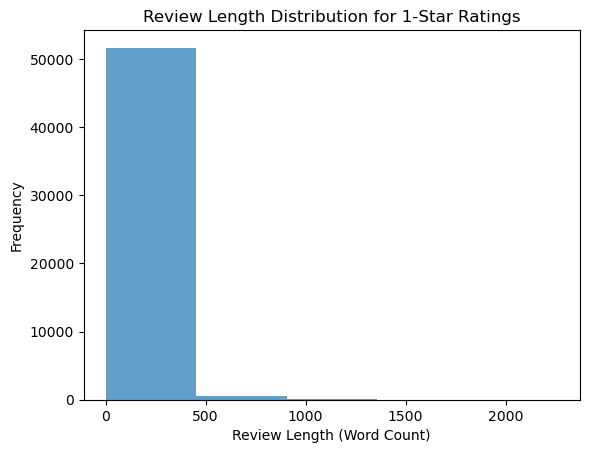

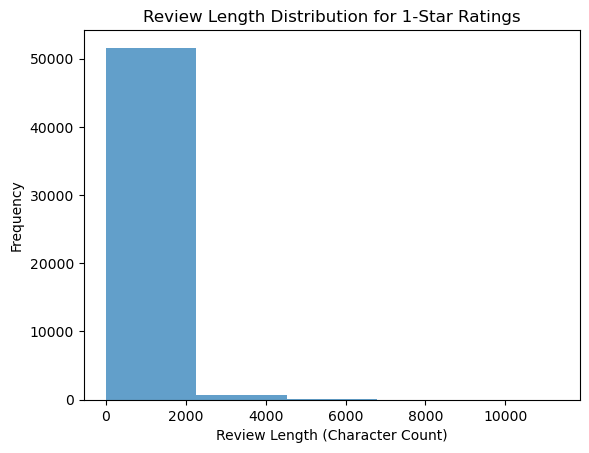

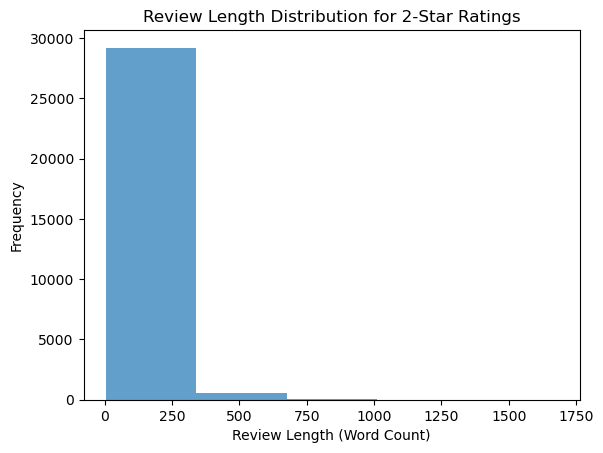

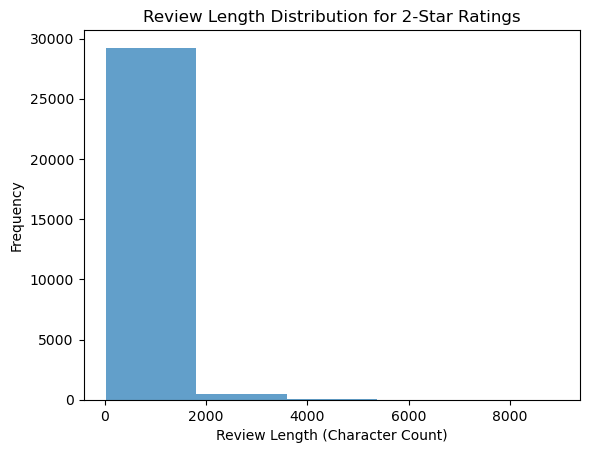

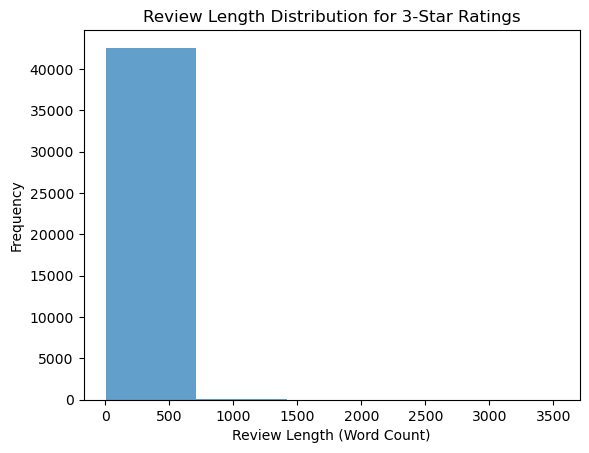

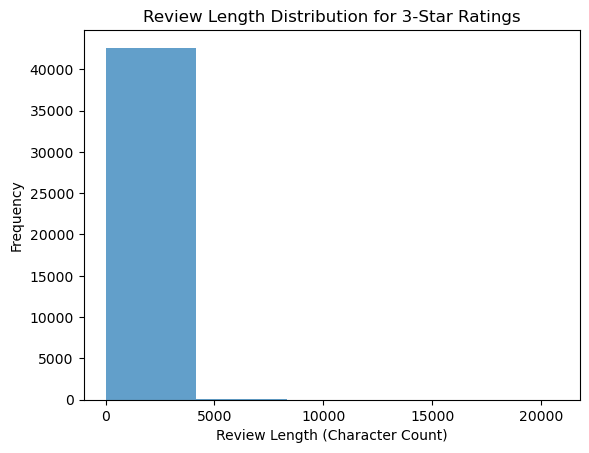

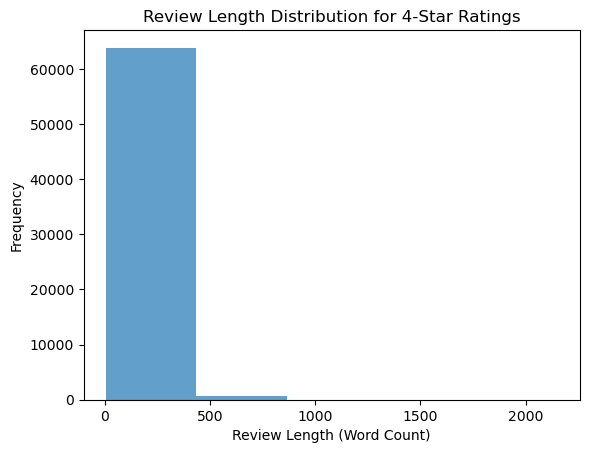

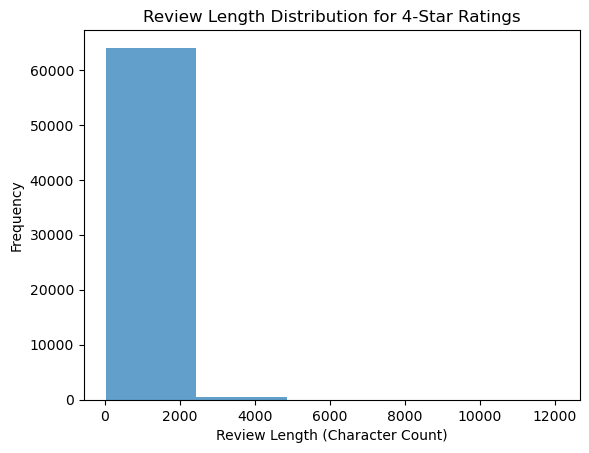

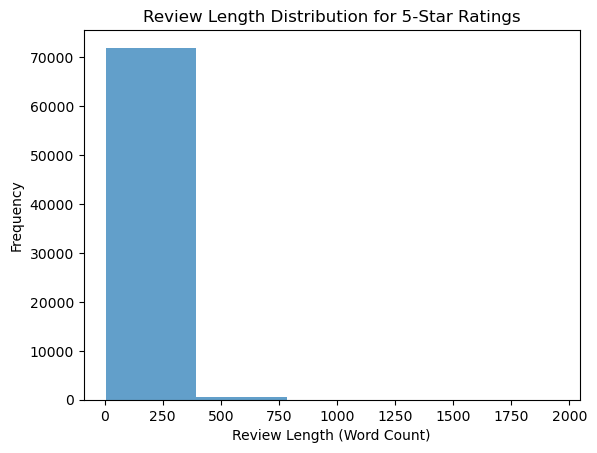

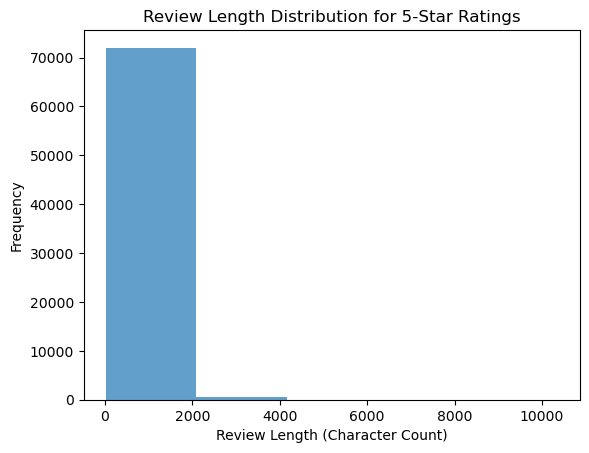

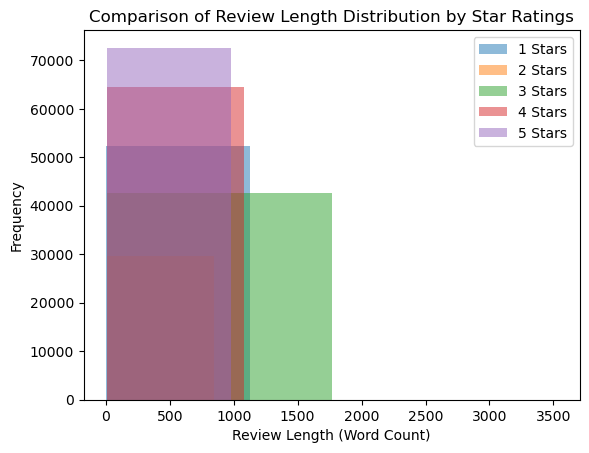

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'review_text' and 'star_rating'

# Calculate the review lengths (number of words or characters)
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['review_text'].apply(lambda x: len(str(x)))

# Group reviews by star ratings
grouped_ratings = df.groupby('review_score')

# Analyze review length distribution for each star rating category
for rating, group in grouped_ratings:
    # Plotting histogram for word count
    plt.figure()
    plt.hist(group['word_count'], bins=5, alpha=0.7)
    plt.xlabel('Review Length (Word Count)')
    plt.ylabel('Frequency')
    plt.title('Review Length Distribution for {}-Star Ratings'.format(rating))
    
    # Plotting histogram for character count
    plt.figure()
    plt.hist(group['char_count'], bins=5, alpha=0.7)
    plt.xlabel('Review Length (Character Count)')
    plt.ylabel('Frequency')
    plt.title('Review Length Distribution for {}-Star Ratings'.format(rating))

# Comparing review length distributions between star rating categories
plt.figure()
for rating, group in grouped_ratings:
    plt.hist(group['word_count'], bins=2, alpha=0.5, label='{} Stars'.format(rating))
plt.xlabel('Review Length (Word Count)')
plt.ylabel('Frequency')
plt.title('Comparison of Review Length Distribution by Star Ratings')
plt.legend()

plt.show()

review_score
1    0.008180
2    0.094674
3    0.164152
4    0.235290
5    0.296638
Name: sentiment_score, dtype: float64


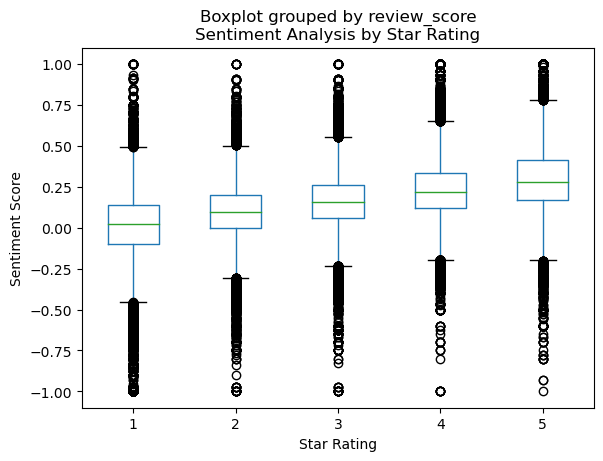

In [88]:
import pandas as pd
from textblob import TextBlob


def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment_score'] = df['review_text'].apply(get_sentiment)

grouped_ratings = df.groupby('review_score')
sentiment_stats = grouped_ratings['sentiment_score'].mean()
print(sentiment_stats)  # Mean sentiment score for each star rating category

# Plotting box plots
df.boxplot(column='sentiment_score', by='review_score', grid=False)
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis by Star Rating')
plt.show()

## 3. Creating Baseline Model

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

y = final_data['review_score']
x = final_data['review_headline']

# Preprocessing and feature extraction
vectorizer = CountVectorizer()  # Bag of words
features = vectorizer.fit_transform(X)
labels = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Training
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Prediction
y_pred = naive_bayes.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5916165377637735
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.70      0.68     10355
           2       0.44      0.35      0.39      6001
           3       0.49      0.46      0.48      8512
           4       0.55      0.53      0.54     13036
           5       0.68      0.74      0.71     14461

    accuracy                           0.59     52365
   macro avg       0.56      0.56      0.56     52365
weighted avg       0.58      0.59      0.59     52365



In [22]:
df.shape

(182537, 4)

In [31]:
final_data = df[['review_score','review_text', 'review_headline']]
final_data.head()

,review_score,review_text,review_headline
1,1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,4,This is a confection that has been around a fe...,"""Delight"" says it all"
3,2,If you are looking for the secret ingredient i...,Cough Medicine
5,4,I got a wild hair for taffy and ordered this f...,Nice Taffy
9,5,This is a very healthy dog food Good for their...,Healthy Dog Food


In [32]:
final_data.columns

Index(['review_score', 'review_text', 'review_headline'], dtype='object')

In [33]:
y = final_data['review_score']
x = final_data['review_headline']

## TFID Vectorizer:

In [64]:
# Creating Document Term Matrix using TFIDFVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(x)
x

<261825x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 14046583 stored elements in Compressed Sparse Row format>

## Fast Text: 

In [50]:
import fasttext
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
# Split into features and target variable
X = final_data['review_headline'].astype(str) + ' ' + final_data['review_text']
y = final_data['review_score']

In [52]:
# Combine preprocessed text and scores into a DataFrame
processed_data = pd.DataFrame({'text': X, 'score': y})

# Shuffle the data
processed_data = processed_data.sample(frac=1, random_state=42)

# Split into training and testing sets
train_size = int(0.8 * len(processed_data))
train_data = processed_data[:train_size]
test_data = processed_data[train_size:]

# Add __label__ prefix to the labels in training data
train_data['label'] = '__label__' + train_data['score'].astype(str)

# Add __label__ prefix to the labels in testing data
test_data['label'] = '__label__' + test_data['score'].astype(str)

# Save the training and testing data to text files
train_data[['text', 'label']].to_csv('train.txt', sep='\t', index=False, header=False)
test_data[['text', 'label']].to_csv('test.txt', sep='\t', index=False, header=False)

/var/folders/x8/pfwdb4lj7tvd04gyn_xrpxsm0000gn/T/ipykernel_17856/3839552540.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'] = '__label__' + train_data['score'].astype(str)
/var/folders/x8/pfwdb4lj7tvd04gyn_xrpxsm0000gn/T/ipykernel_17856/3839552540.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['label'] = '__label__' + test_data['score'].astype(str)


In [53]:
# Train the fastText model
model = fasttext.train_supervised(input='train.txt')

Read 20M words
Number of words:  150485
Number of labels: 5
Progress: 100.0% words/sec/thread: 6004920 lr:  0.000000 avg.loss:  0.953787 ETA:   0h 0m 0s


In [54]:
# Predict on the test data
y_pred = model.predict(list(test_data['text']))

In [55]:
# Extract the predicted labels
y_pred_labels = [label[0].replace('__label__', '') for label in y_pred[0]]

# Convert the predicted labels to integers
y_pred_labels = np.array(y_pred_labels).astype(int)

# Calculate the accuracy score
accuracy = np.mean(y_pred_labels == test_data['score'].values)

accuracy

0.6375250644514465

## CNN: 

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [22]:
# Split the data into input (X) and target (y)
X = final_data['review_headline'].astype(str) + ' ' + final_data['review_text']
y = final_data['review_score']

# Convert the star ratings to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Tokenize the input text and convert it to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [24]:
# Pad the sequences to have the same length
max_sequence_length = max([len(seq) for seq in X_train])
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [25]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
filters = 100
kernel_size = 3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Determine the number of classes
num_classes = len(label_encoder.classes_)

# Build the CNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
filters = 100
kernel_size = 3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Train the model
num_epochs = 3
batch_size = 32
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)


Epoch 1/3
6546/6546 [==============================] - 1184s 181ms/step - loss: 0.8861 - accuracy: 0.6363 - val_loss: 0.7812 - val_accuracy: 0.6865
Epoch 2/3
6546/6546 [==============================] - 1601s 245ms/step - loss: 0.6406 - accuracy: 0.7506 - val_loss: 0.7326 - val_accuracy: 0.7163
Epoch 3/3
1637/1637 [==============================] - 96s 58ms/step
Accuracy: 0.7234794232789077


In [28]:
## make sure comparing all models are running on the same dataset 
## check for overfitting !!!!
classification_rep = classification_report(y_test, y_pred_labels)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.75      0.87      0.81     10355
           1       0.68      0.49      0.57      6001
           2       0.64      0.67      0.66      8512
           3       0.70      0.67      0.69     13036
           4       0.79      0.79      0.79     14461

    accuracy                           0.72     52365
   macro avg       0.71      0.70      0.70     52365
weighted avg       0.72      0.72      0.72     52365



### Random Forest

In [66]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Define the parameter grid for grid search
param_dist = {
    'n_estimators': randint(5, 30),  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'max_features': ['sqrt', 'log2'],  # Maximum number of features to consider at each split
}


In [67]:
rfc = RandomForestClassifier(random_state=0)
#rfc.fit(x_train, y_train)
grid_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=10, cv=5)
grid_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3d7c8b100>})

In [68]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 28}


In [69]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)

y_pred = best_model.predict(x_test)
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           1       0.70      0.76      0.73     10537
           2       0.84      0.41      0.55      5952
           3       0.71      0.48      0.58      8591
           4       0.59      0.59      0.59     12784
           5       0.61      0.81      0.70     14501

    accuracy                           0.65     52365
   macro avg       0.69      0.61      0.63     52365
weighted avg       0.67      0.65      0.64     52365



In [70]:
print('accuracy: ', accuracy_score(y_test, y_pred))

accuracy:  0.6476654253795474


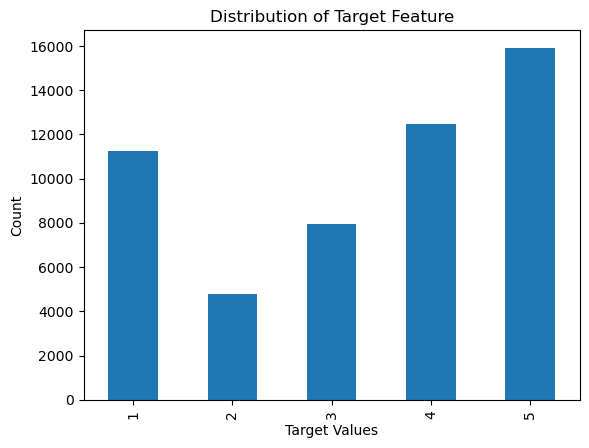

In [89]:
y_pred_series = pd.Series(y_pred)

distribution = y_pred_series.value_counts().sort_index()
distribution.plot(kind='bar')
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.title('Distribution of Target Feature')
plt.show()

## XGBboost: 

In [71]:
import xgboost as xgb

y = y-1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [72]:
y_pred = xgb_model.predict(x_test)


In [73]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6125083548171488


In [74]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.67      0.77      0.72     10537
           1       0.64      0.28      0.39      5952
           2       0.58      0.45      0.51      8591
           3       0.53      0.57      0.55     12784
           4       0.65      0.76      0.70     14501

    accuracy                           0.61     52365
   macro avg       0.61      0.57      0.57     52365
weighted avg       0.61      0.61      0.60     52365

